# Module 3 Assignment 04-07-2023 C1-04
# Ahmad Ali

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('heart.csv')

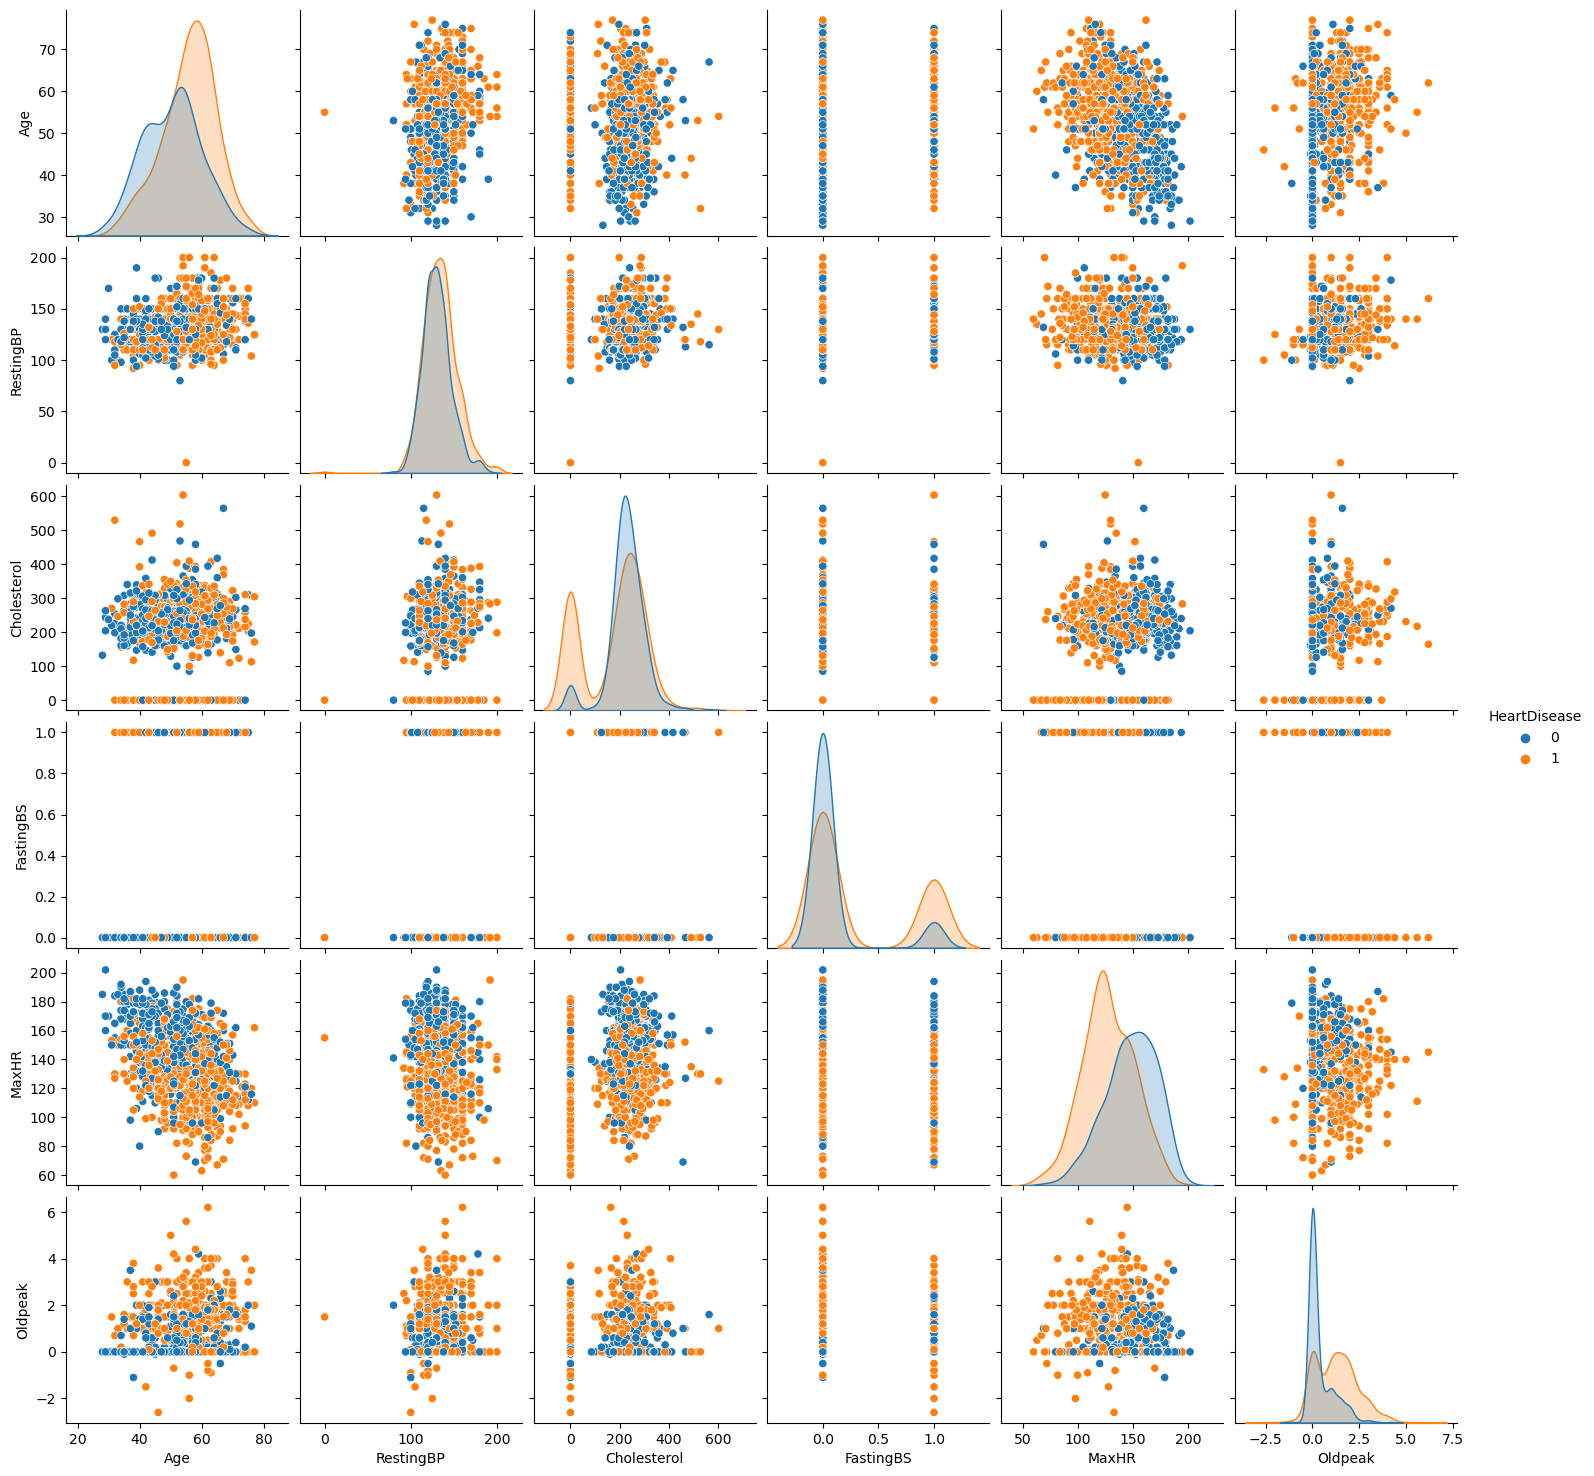

In [2]:
import seaborn as sns
sns.pairplot(df,hue='HeartDisease')

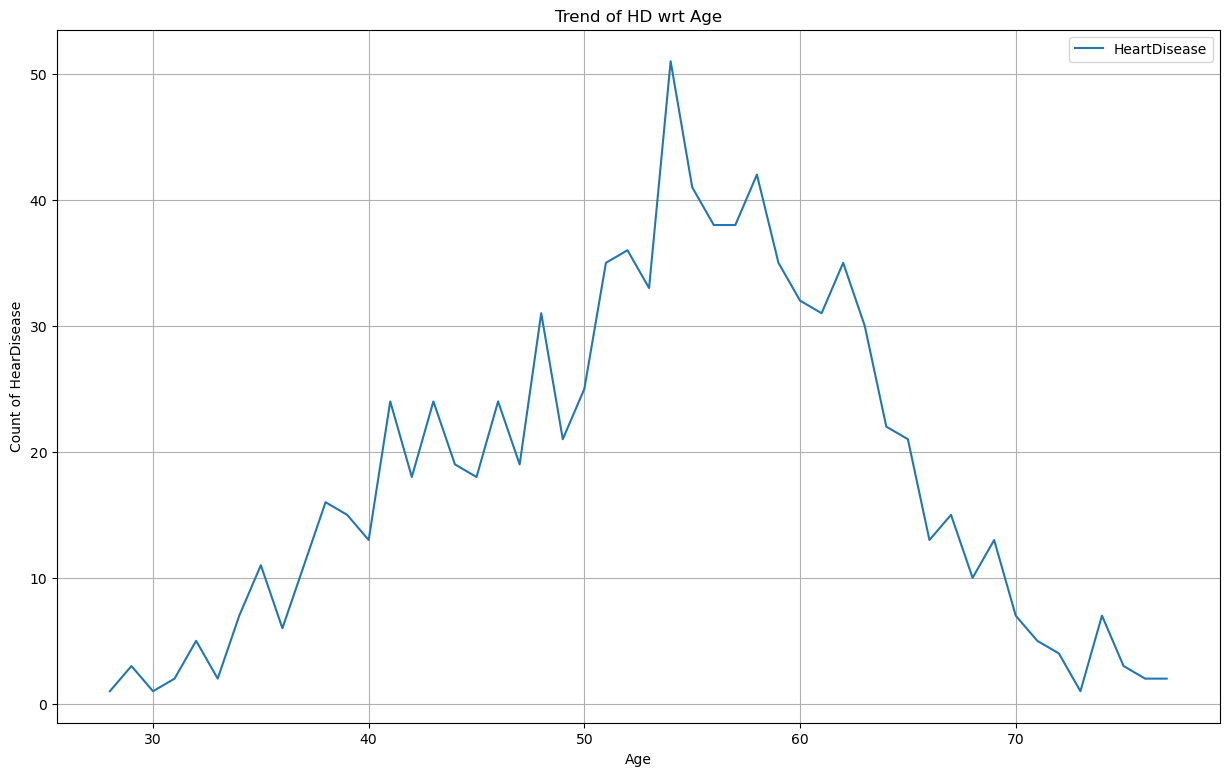

In [18]:
a=df.groupby('Age')['HeartDisease'].count()
a
plt.figure(figsize=(15,9))
a.plot()
plt.xlabel('Age')
plt.ylabel('Count of HearDisease')
plt.title('Trend of HD wrt Age')
plt.legend()
plt.grid()

<AxesSubplot:xlabel='count', ylabel='Sex'>

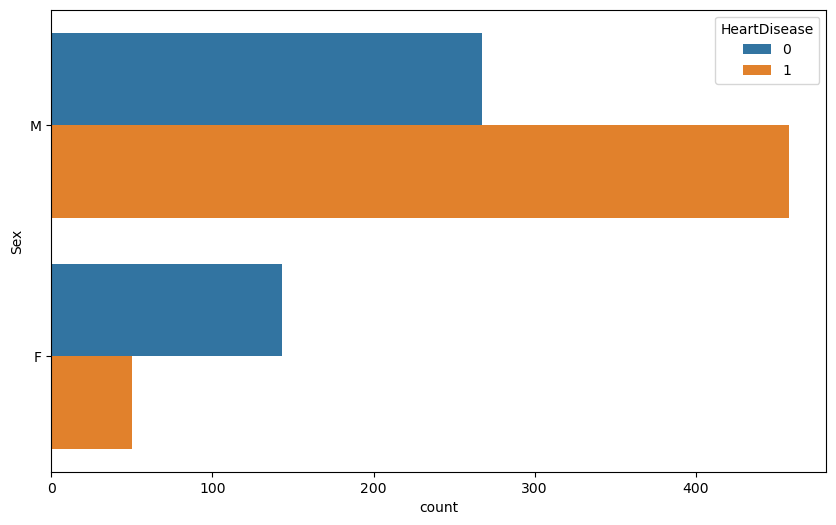

In [13]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="Sex",hue='HeartDisease')

<AxesSubplot:xlabel='count', ylabel='ChestPainType'>

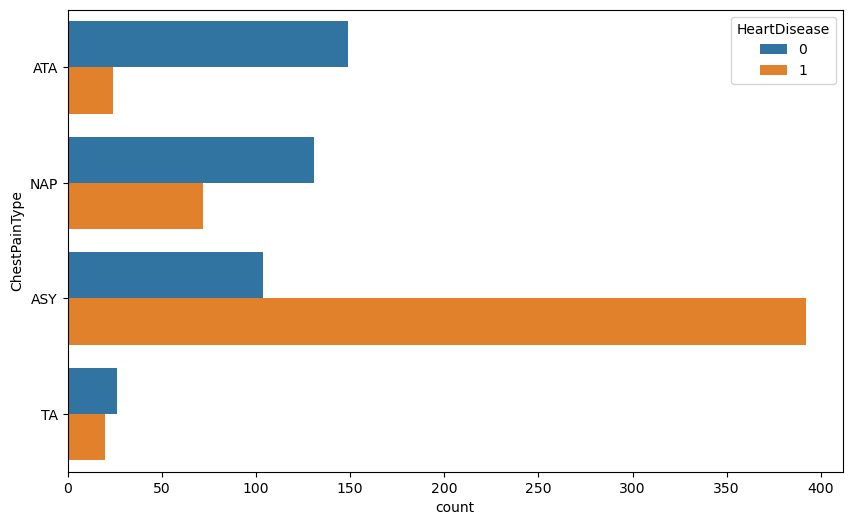

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="ChestPainType",hue='HeartDisease')

<AxesSubplot:xlabel='count', ylabel='RestingECG'>

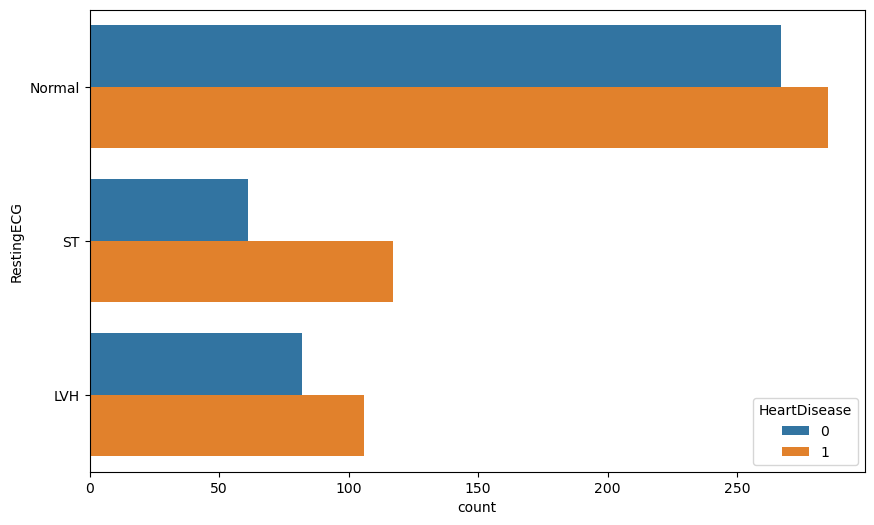

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="RestingECG",hue='HeartDisease')

<AxesSubplot:xlabel='count', ylabel='ExerciseAngina'>

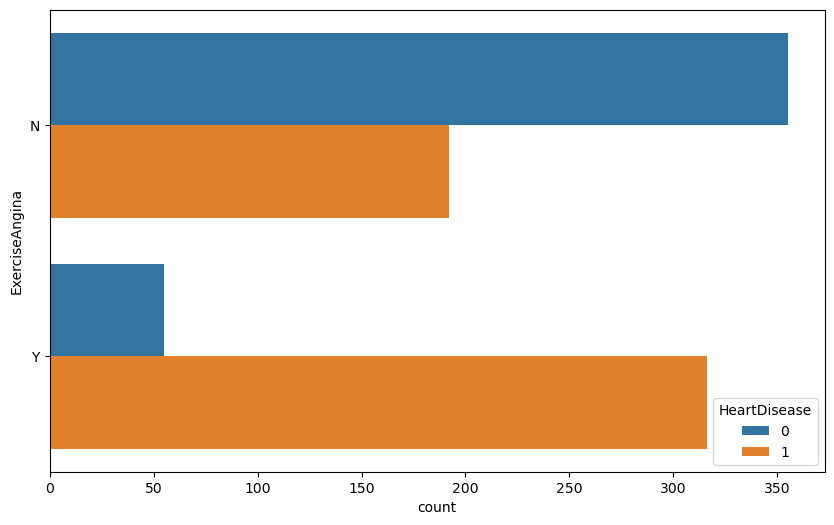

In [16]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="ExerciseAngina",hue='HeartDisease')

<AxesSubplot:xlabel='count', ylabel='ST_Slope'>

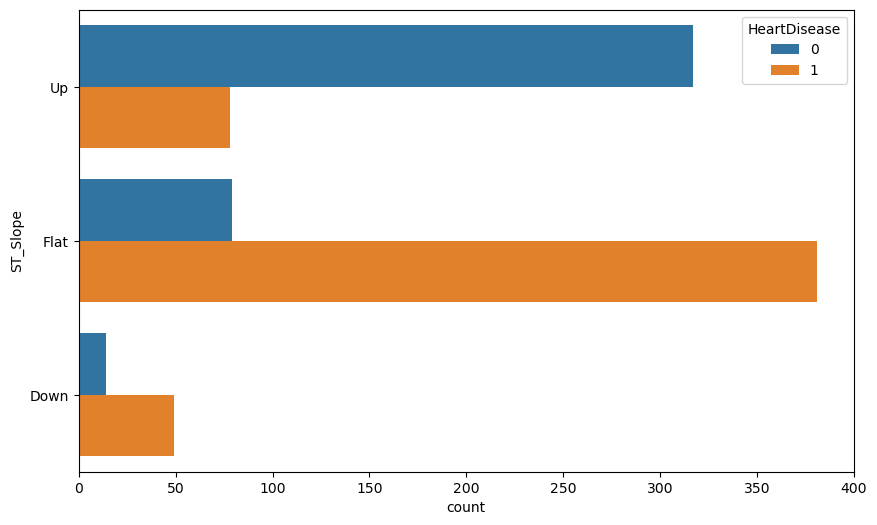

In [17]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="ST_Slope",hue='HeartDisease')

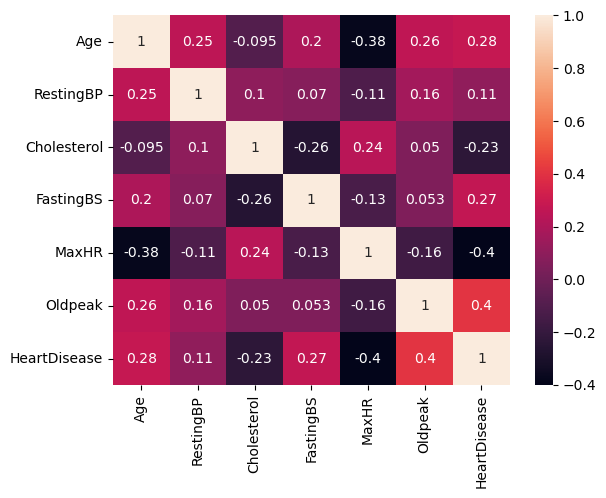

In [3]:
import seaborn as sns
correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True)
plt.show()

# Model Training

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('heart.csv')

X=df.drop(['HeartDisease'],axis=1)

y=df['HeartDisease']

lab=LabelEncoder()
y1=lab.fit_transform(y)

X_numeric=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
X_categoric=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

a=Pipeline(steps=[('num',MinMaxScaler())])
b=Pipeline(steps=[('cat',OneHotEncoder())])

preprocess=ColumnTransformer(transformers=[('apply1',a,X_numeric),('apply2',b,X_categoric)])

pipeline=Pipeline(steps=[('preprocess',preprocess),('predict',LogisticRegression())])

pipeline.fit(X,y1)

joblib.dump(pipeline,'model_heartdisease.pkl')

joblib.dump(lab,'lab_heartdisease.pkl')

['lab_heartdisease.pkl']

# Deployment

In [33]:
model=joblib.load('model_heartdisease.pkl')
lab=joblib.load('lab_heartdisease.pkl')

X=df.drop(['HeartDisease'],axis=1)
data=X.iloc[5:450:3]

prep=model['preprocess'].transform(data)
predict=model['predict'].predict(prep)
y_pred = lab.inverse_transform(predict)

a=df.iloc[5:450:3,11]
com=pd.DataFrame({'Actual_HD':a, 'Predict_HD':y_pred})
com



,Actual_HD,Predict_HD
5,0,0
8,1,1
11,1,1
14,0,0
17,0,0
...,...,...
437,1,1
440,1,0
443,1,1
446,1,1


In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
acc_score=accuracy_score(a,y_pred)*100
print('Accuracy Score=',acc_score,'%')

cm=confusion_matrix(a,y_pred)
print('Confusion Matrix:')
print(cm)

"""Calculate precision score"""

precision = precision_score(a, y_pred, average='weighted')
print('Precision:', precision*100,'%')

# Calculate recall score

recall = recall_score(a, y_pred, average='weighted')
print('Recall:', recall*100,'%')

# Calculate F1 score

f1 = f1_score(a, y_pred, average='weighted')
print('F1 Score:', f1*100,'%')


Accuracy Score= 93.28859060402685 %
Confusion Matrix:
[[56  7]
 [ 3 83]]
Precision: 93.36088676550514 %
Recall: 93.28859060402685 %
F1 Score: 93.25483351503814 %


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


df=pd.read_csv('heart.csv')

X=df.drop(['HeartDisease'],axis=1)

y=df['HeartDisease']

lab=LabelEncoder()
# y1=lab.fit_transform(y)

X['Sex']=lab.fit_transform(X['Sex'])
X['ChestPainType']=lab.fit_transform(X['ChestPainType'])
X['RestingECG']=lab.fit_transform(X['RestingECG'])
X['ExerciseAngina']=lab.fit_transform(X['ExerciseAngina'])
X['ST_Slope']=lab.fit_transform(X['ST_Slope'])
scaler1 = StandardScaler()
X_scaled = scaler1.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4,random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred =model.predict(X_test)

y=pd.DataFrame({'Actual':y_test, 'Predict':y_pred})

y

acc_score=accuracy_score(y_test,y_pred)*100
print('Accuracy Score=',acc_score,'%')

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm)

"""Calculate precision score"""


precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision*100,'%')

# Calculate recall score

recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall*100,'%')

# Calculate F1 score

f1 = f1_score(y_test, y_pred, average='weighted')
# print('F1 Score:', f1*100,'%')




Accuracy Score= 84.51086956521739 %
Confusion Matrix:
[[130  17]
 [ 40 181]]
Precision: 85.44484163889534 %
Recall: 84.51086956521739 %
